<a href="https://colab.research.google.com/github/anjali0503/Support-Vector-Machine-SVM-/blob/main/Spam_Mail_Pridiction(ML_PROJECT).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***MACHINE LEARNING MINI PROJECT***


TE-COMPUTER
* ANJALI RAMLOLARAKH PANDEY [56]
* MINAL GUHAVNE[46]
* YOGITA PANDEY [57]

#**SPAM MAIL PRIDICTION** using **SUPPORT VECTOR MACHINE** (SVM)



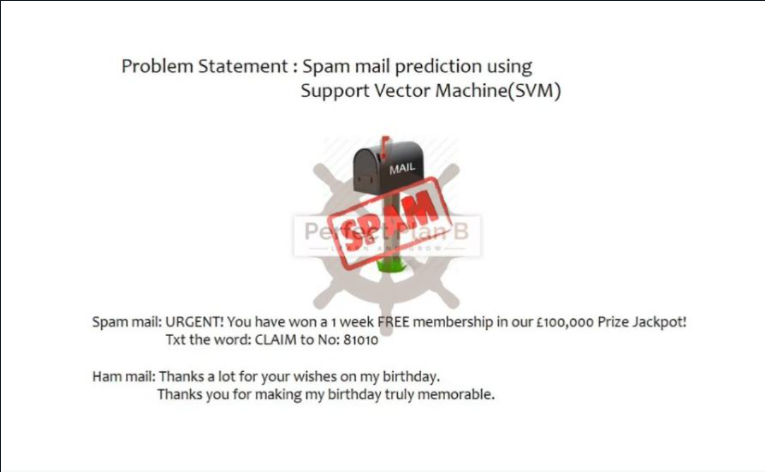

##Support vector Machine (**SVM**)

Support vector machines (SVMs) are a set of supervised learning methods used for classification, regression and outliers detection.

###The advantages of support vector machines are:

Effective in high dimensional spaces.

Still effective in cases where number of dimensions is greater than the number of samples.

Uses a subset of training points in the decision function (called support vectors), so it is also memory efficient.

Versatile: different Kernel functions can be specified for the decision function. Common kernels are provided, but it is also possible to specify custom kernels.




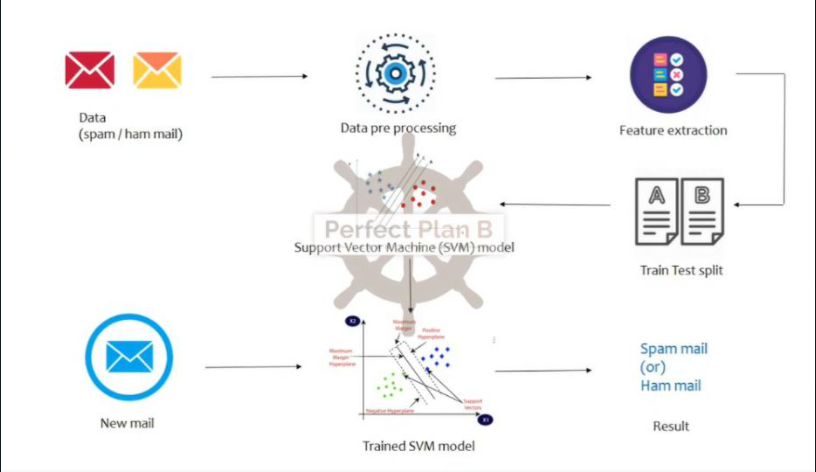

In [ ]:
# importing dependencies

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split # this function is used to separate data from test and train splits
from sklearn.feature_extraction.text import TfidfVectorizer # TfidfVectorizer  is use to extract feature 
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score # we need accuracy score to check how well model works , its for evalution part


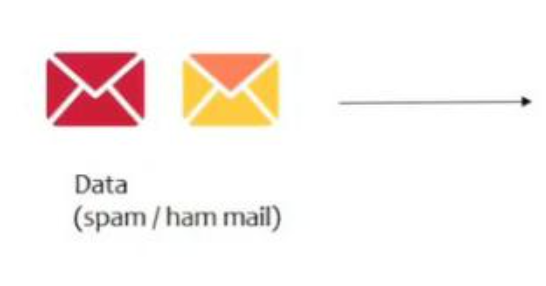

**Data Preprosessing**

In [ ]:
# loading data to pandas data frame

raw_mail_data = pd.read_csv('spam.csv',encoding="latin1")


In [ ]:
raw_mail_data

,categories,message,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


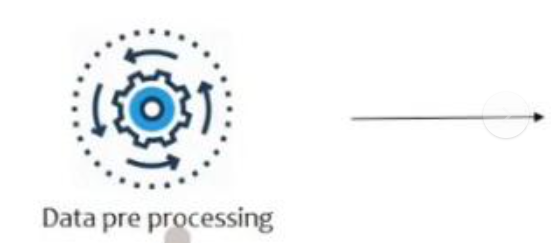

In [ ]:


#replace the null value to null str
mail_data = raw_mail_data.where((pd.notnull(raw_mail_data)),"")
mail_data.drop('Unnamed: 2', inplace=True, axis=1)
mail_data.drop('Unnamed: 3', inplace=True, axis=1)
mail_data.drop('Unnamed: 4', inplace=True, axis=1)


**Shape of dATA**

In [ ]:
mail_data.shape

(5572, 2)

In [ ]:
mail_data.head()

,categories,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
mail_data.tail()

,categories,message
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


In [ ]:
# label spam mail as 0 ; and non spam mail (ham) as 1.
mail_data.loc[mail_data['categories'] == "spam" , "categories"] = 0 #this is use to locate the sample
mail_data.loc[mail_data["categories"] == "ham" , "categories"] = 1

In [ ]:
 #  now will separate the data as text and label -----> where text = X & label = Y
 X = mail_data["message"]
 Y = mail_data["categories"]

In [ ]:
print(X)
print("-----------------------------------------------------------")
print(Y)

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: message, Length: 5572, dtype: object
-----------------------------------------------------------
0       1
1       1
2       0
3       1
4       1
       ..
5567    0
5568    1
5569    1
5570    1
5571    1
Name: categories, Length: 5572, dtype: object


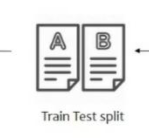

**TRAIN AND TEST SPLIT**

In [ ]:
# split the the data as train data and split data
X_train ,X_test, Y_train,Y_test = train_test_split(X,Y,train_size = 0.8,test_size = 0.2,random_state = 3)

**Feacture Extraction**

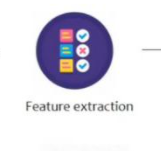

In [ ]:
# tranfroming text data to feacture vectores that can be used as inpute to the SVM model using Tfidfvectorizator
# convert the message to lower case letters

feacture_extraction = TfidfVectorizer(min_df= 1 , stop_words="english",lowercase="True")
X_train_feactures = feacture_extraction.fit_transform(X_train)
X_test_feactures = feacture_extraction.transform(X_test)

# convert Y_train and Y_test values as interger
Y_train = Y_train.astype("int")
Y_test = Y_test.astype("int")


Training the Model **Support vector machine**

In [ ]:
#traing the svm with tringing data

model = LinearSVC()
model.fit(X_train_feactures,Y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

**Evaluation** of model

In [ ]:
# prediction on training data
prediction_on_training_data = model.predict(X_train_feactures)
accuracy_on_training_data = accuracy_score(Y_train,prediction_on_training_data)


In [ ]:
print("Accuracy of training data : " ,accuracy_on_training_data)


Accuracy of training data :  0.9995512676688355


In [ ]:
# prediction on test data
prediction_on_test_data = model.predict(X_test_feactures)
accuracy_on_test_data = accuracy_score(Y_test,prediction_on_test_data)


In [ ]:
print("Accuracy of test data : " ,accuracy_on_training_data)


Accuracy of test data :  0.9995512676688355


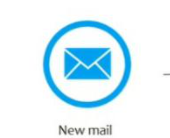

**Predition on new MAIL** , 

* testing wheather its spam or ham mail

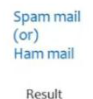

In [ ]:
input_mail = ["URGENT! You have won a 1 week FREE membership in our å£100,000 Prize Jackpot! Txt the word: CLAIM to No: 81010 T&C www.dbuk.net LCCLTD POBOX 4403LDNW1A7RW18"]
#convert text  to feature vectors
input_mail_features = feacture_extraction.transform(input_mail)

#making prediction 
prediction = model.predict(input_mail_features)
print(prediction)


if (prediction[0] == 1):
  print("Ham mail")
else:
  print("Spam mail")

[0]
Spam mail


In [ ]:
input_mail = ["Well keep in mind I've only got enough gas for one more round trip barring a sudden influx of cash"]
#convert text  to feature vectors
input_mail_features = feacture_extraction.transform(input_mail)

#making prediction 
prediction = model.predict(input_mail_features)
print(prediction)


if (prediction[0] == 1):
  print("Ham mail")
else:
  print("Spam mail")

[1]
Ham mail
